In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (200, 200, 3), data_format = 'channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [3]:
train_dir = "F:\MIDS\w210 Capstone\data\\train"
val_dir = "F:\MIDS\w210 Capstone\data\\validation"
save_dir = "F:\MIDS\w210 Capstone\\models"

In [5]:
batch_size = 32

train_datagen = ImageDataGenerator(rotation_range = 40,
                                     width_shift_range = 20,
                                     height_shift_range = 20, 
                                     rescale = 1/255.0,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode = 'reflect')

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (200, 200),
                                                   batch_size = batch_size,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

validation_generator = test_datagen.flow_from_directory(val_dir,
                                                        target_size = (200, 200),
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical')

Found 26634 images belonging to 5 classes.
Found 5708 images belonging to 5 classes.


In [6]:
model.fit_generator(generator = train_generator,
                    steps_per_epoch = 30000//batch_size,
                    epochs = 50,
                    validation_data = validation_generator,
                    validation_steps = 5708//batch_size)

model.save(f'{save_dir}\\third_model.h5')

Epoch 1/50
937/937 [==============================] - 1660s 2s/step - loss: 0.4948 - acc: 0.8063 - val_loss: 0.1196 - val_acc: 0.9637
Epoch 2/50
937/937 [==============================] - 1623s 2s/step - loss: 0.2597 - acc: 0.8986 - val_loss: 0.1831 - val_acc: 0.9191
Epoch 3/50
937/937 [==============================] - 1643s 2s/step - loss: 0.2158 - acc: 0.9163 - val_loss: 0.0724 - val_acc: 0.9686
Epoch 4/50
937/937 [==============================] - 1620s 2s/step - loss: 0.1678 - acc: 0.9346 - val_loss: 0.0829 - val_acc: 0.9690
Epoch 5/50
937/937 [==============================] - 1547s 2s/step - loss: 0.1520 - acc: 0.9419 - val_loss: 0.0383 - val_acc: 0.9870
Epoch 6/50
937/937 [==============================] - 1655s 2s/step - loss: 0.1460 - acc: 0.9443 - val_loss: 0.0503 - val_acc: 0.9873
Epoch 7/50
937/937 [==============================] - 1657s 2s/step - loss: 0.1256 - acc: 0.9517 - val_loss: 0.0453 - val_acc: 0.9847
Epoch 8/50
937/937 [==============================] - 1631s 2s

In [13]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

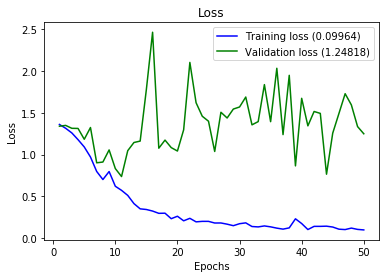

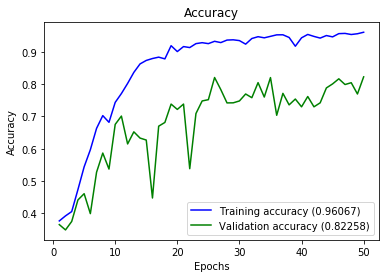

In [15]:
plot_history(model.history)